# Proyecto de analisis del mercado de criptomonedas - Analisis Exploratorio de Datos

Se importan las librerias necesarias y se leen los datasets

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf

Se crean las funciones de graficación

In [2]:
# Gráfico de la serie temporal de retornos
def time_series_plot(x, y):
    plt.figure(figsize=(12, 6))
    plt.plot(x, y)
    plt.title('Serie Temporal de Retornos')
    plt.xlabel('Fecha')
    plt.ylabel('Retorno')
    plt.show()

# Gráfico de distribución de los retornos
def distribution_plot(x):
    plt.figure(figsize=(12, 6))
    sns.histplot(x, kde=True)
    plt.title('Distribución de Retornos')
    plt.xlabel('Retorno')
    plt.ylabel('Frecuencia')
    # Calcular la media y la desviación estándar de los retornos
    returns_mean = np.mean(x)
    returns_std = np.std(x)
    # Agregar las líneas de desviación estándar
    plt.axvline(returns_mean - 2 * returns_std, color='red', linestyle='--', label='2nd std dev.')
    plt.axvline(returns_mean + 2 * returns_std, color='red', linestyle='--')
    plt.legend()
    plt.show()

# Gráfico de volatilidad de los retornos
def volatility_plot(x, y):
    volatility = y.rolling(window=30).std().pct_change()
    plt.figure(figsize=(12, 6))
    plt.plot(x, volatility)
    plt.title('Volatilidad de Retornos')
    plt.xlabel('Fecha')
    plt.ylabel('Volatilidad')
    plt.show()

# Gráfico de autocorrelación
def autocorrelation_plot(x):
    plt.figure(figsize=(12, 6))
    plot_acf(x, lags=10)
    plt.xlabel('Lags')
    plt.ylabel('Autocorrelación')
    plt.show()

# Gráfico de correlación de los retornos
def correlation_matrix_plot(x):
    plt.figure(figsize=(8, 6))
    sns.heatmap(x.corr(), annot=True, cmap='coolwarm')
    plt.title('Correlación de Retornos')
    plt.show()

In [3]:
# Lee los dataframes con la informacion de las monedas
binancecoin = pd.read_csv(r'Final dataframes returns\binancecoin.csv')
bitcoin = pd.read_csv(r'Final dataframes returns\bitcoin.csv')
cardano = pd.read_csv(r'Final dataframes returns\cardano.csv')
ethereum_classic = pd.read_csv(r'Final dataframes returns\ethereum-classic.csv')
ethereum = pd.read_csv(r'Final dataframes returns\ethereum.csv')
litecoin = pd.read_csv(r'Final dataframes returns\litecoin.csv')
ripple = pd.read_csv(r'Final dataframes returns\ripple.csv')
stellar = pd.read_csv(r'Final dataframes returns\stellar.csv')
tron = pd.read_csv(r'Final dataframes returns\tron.csv')
vechain = pd.read_csv(r'Final dataframes returns\vechain.csv')

In [4]:
# Crea un diccionario de dataframes
data = {'binancecoin': binancecoin, 'bitcoin': bitcoin, 'cardano': cardano, 'ethereum_classic': ethereum_classic, 'ethereum': ethereum, 'litecoin': litecoin, 'ripple': ripple, 'stellar': stellar, 'tron': tron, 'vechain': vechain}

In [5]:
# Rankea por magnitud de capitalizacion de mercado
market_cap_order = ['bitcoin', 'ethereum', 'binancecoin', 'ripple', 'cardano', 'tron', 'litecoin', 'stellar', 'ethereum-classic', 'vechain']

In [6]:
# Convierte la columna Open time a formato datetime en todos los dataframes
for key, value in data.items():
    data[key]['Open time'] = pd.to_datetime(data[key]['Open time'])

Procedemos a investigar el contenido de los dataframes y por cuestiones de practicidad unicamente vamos a graficar la distribucion y caracteristicas de la columna 'Strategy_returns' ya que son los retornos de la estrategia de compra y venta que seran utilizados para generar los KPI. Como dato adicional se debe aclarar que el analisis esta pensado para operaciones en el mercado de futuros donde se puede capitalizar tanto en movimientos alcistas (long) como en movimientos bajistas (short)

# Bitcoin

In [7]:
# Informacion sobre las columnas
data['bitcoin'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1843 entries, 0 to 1842
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Open time         1843 non-null   datetime64[ns]
 1   Close             1843 non-null   float64       
 2   total_volumes     1843 non-null   float64       
 3   market_caps       1843 non-null   float64       
 4   POC               1843 non-null   float64       
 5   Directional_bias  1843 non-null   int64         
 6   Next_close        1843 non-null   float64       
 7   Strategy_returns  1843 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 115.3 KB


In [8]:
# Evalua la presencia de duplicados
data['bitcoin'].duplicated().sum()

0

In [9]:
# Genera estadisticas descriptivas
data['bitcoin'].describe()

,Open time,Close,total_volumes,market_caps,POC,Directional_bias,Next_close,Strategy_returns
count,1843,1843.000000,1843.000000,1843.000000,1843.000000,1843.000000,1843.000000,1843.000000
mean,2021-02-03 00:00:00,0.136241,4.345475,0.142163,0.132899,0.459034,0.136235,0.162528
min,2018-07-28 00:00:00,-39.504847,-80.345625,-35.775702,-22.917911,0.000000,-39.504847,-16.763913
25%,2019-10-31 12:00:00,-1.423550,-12.686292,-1.315380,-1.321982,0.000000,-1.423550,-1.422111
50%,2021-02-03 00:00:00,0.031180,-0.674773,0.079003,0.078442,0.000000,0.031180,0.206597
75%,2022-05-09 12:00:00,1.655641,14.782133,1.615604,1.590257,1.000000,1.655641,1.618633
max,2023-08-13 00:00:00,19.536139,323.774922,19.210984,23.531489,1.000000,19.536139,39.504847
std,NaN,3.624806,33.037768,3.557644,3.506478,0.498454,3.624805,3.623721


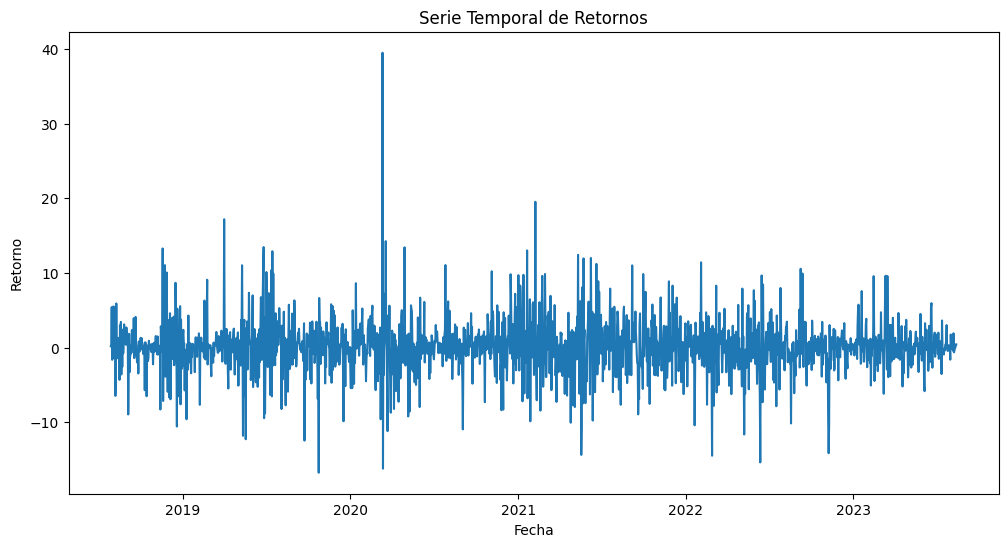

In [10]:
time_series_plot(data['bitcoin']['Open time'], data['bitcoin']['Strategy_returns'])

Se observa una serie temporal de retornos con media que tiende a 0. La estrategia logro capitalizarse durante la crisis del coronavirus en marzo del 2020 que afecto severamente a los mercados

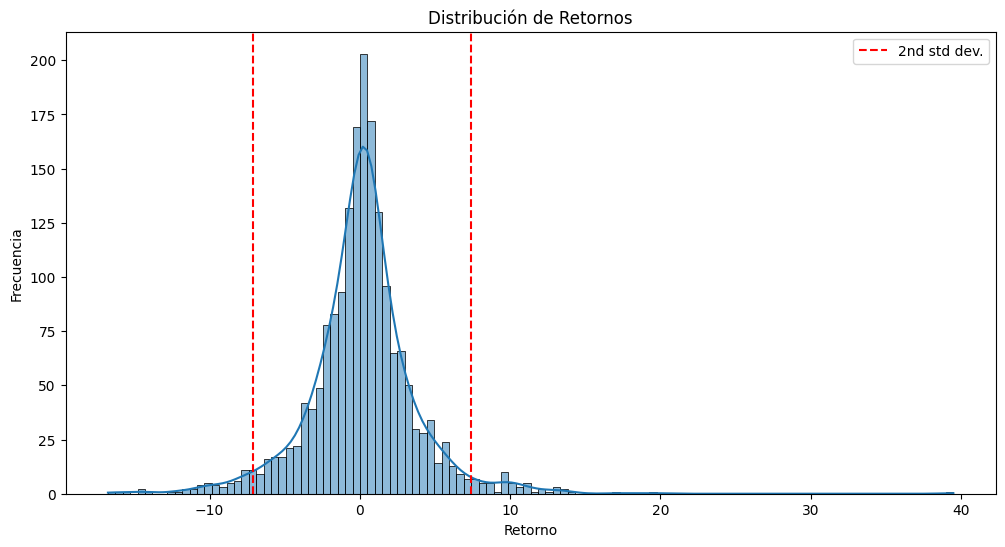

In [11]:
distribution_plot(data['bitcoin']['Strategy_returns'])

Se observa una distribucion normal de los retornos de la estrategia con una asimetría positiva, es decir que hay mas presencia de valores atipicos positivos que negativos. Los valores que estan por fuera de la segunda desviacion estandar son considerados outliers

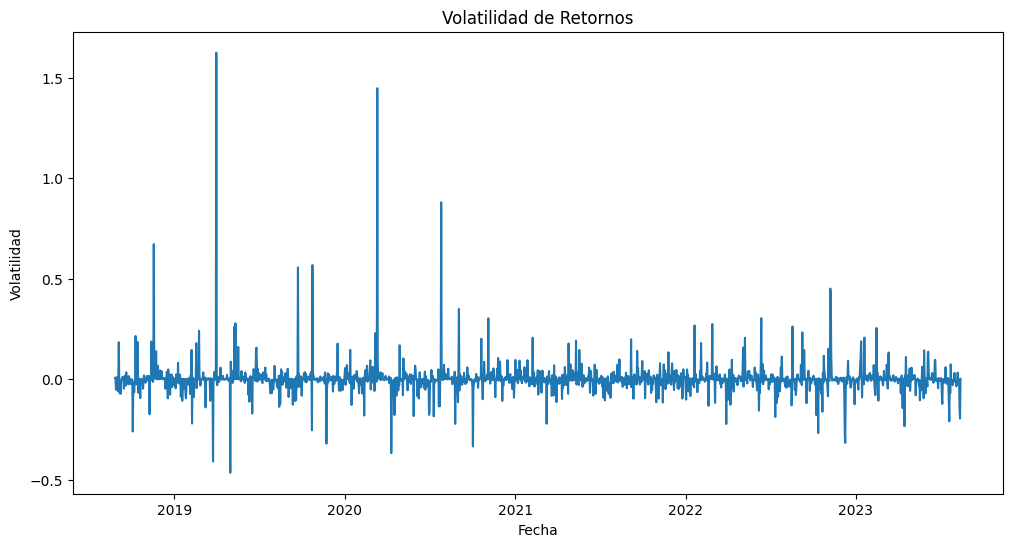

In [12]:
volatility_plot(data['bitcoin']['Open time'], data['bitcoin']['Strategy_returns'])

Se observa una serie temporal de retornos de la volatilidad en donde la media tiende a 0 y se ven valores atipicos muy grandes. Tambien se observa un fenomeno de clustering, es decir que hay periodos en donde los valores de volatilidad tienden a estar cercanos entre si (ya sea baja o alta volatilidad).

<Figure size 1200x600 with 0 Axes>

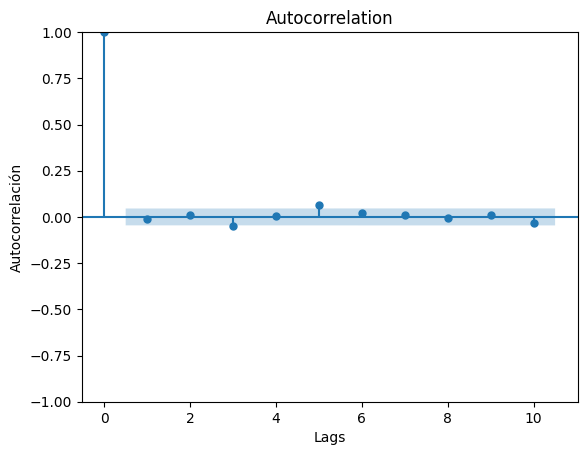

In [13]:
autocorrelation_plot(data['bitcoin']['Strategy_returns'])

En este grafico se evidencia que el tercer y quinto lag de un retorno de la estrategia tienen una correlacion significativa con el ultimo valor registrado. Esto puede ser util para buscar patrones estacionales

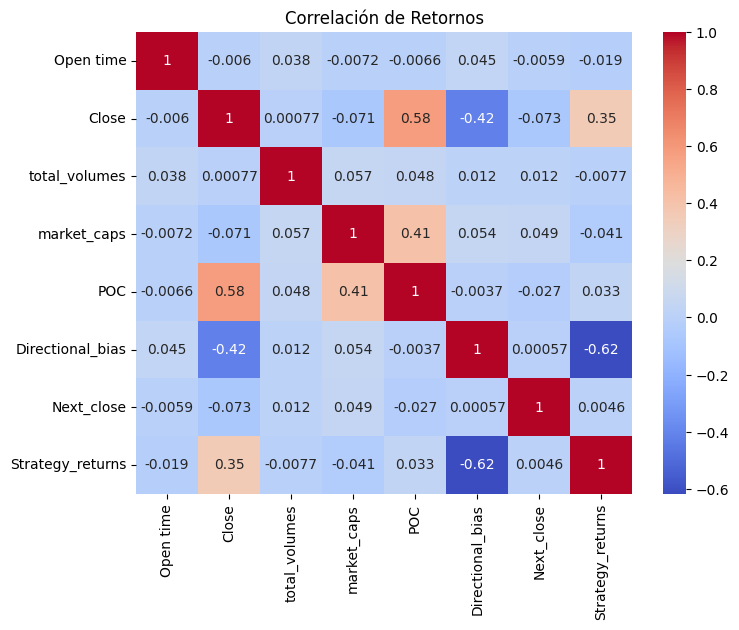

In [14]:
correlation_matrix_plot(data['bitcoin'])

Se observa una matriz de correlacion en donde 'Close', 'POC' y 'market_caps' tienen una correlacion positiva significativa. Por otro lado 'Strategy_returns' y 'Directional_bias' tienen una correlacion negativa significativa

# Ethereum

In [15]:
# Informacion sobre las columnas
data['ethereum'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1843 entries, 0 to 1842
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Open time         1843 non-null   datetime64[ns]
 1   Close             1843 non-null   float64       
 2   total_volumes     1843 non-null   float64       
 3   market_caps       1843 non-null   float64       
 4   POC               1843 non-null   float64       
 5   Directional_bias  1843 non-null   int64         
 6   Next_close        1843 non-null   float64       
 7   Strategy_returns  1843 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 115.3 KB


In [16]:
# Evalua la presencia de duplicados
data['ethereum'].duplicated().sum()

0

In [17]:
# Genera estadisticas descriptivas
data['ethereum'].describe()

,Open time,Close,total_volumes,market_caps,POC,Directional_bias,Next_close,Strategy_returns
count,1843,1843.000000,1843.000000,1843.000000,1843.000000,1843.000000,1843.000000,1843.000000
mean,2021-02-03 00:00:00,0.190638,5.874062,0.196917,0.178098,0.463918,0.190871,0.157961
min,2018-07-28 00:00:00,-44.596886,-89.339892,-44.062735,-26.755993,0.000000,-44.596886,-24.336858
25%,2019-10-31 12:00:00,-2.044348,-14.361463,-1.957253,-1.835045,0.000000,-2.044348,-2.060005
50%,2021-02-03 00:00:00,0.047965,-0.916699,0.048938,0.138126,0.000000,0.049391,0.272454
75%,2022-05-09 12:00:00,2.431635,15.933040,2.375726,2.394972,1.000000,2.431635,2.335900
max,2023-08-13 00:00:00,26.332887,1194.999543,27.010482,24.975312,1.000000,26.332887,44.596886
std,NaN,4.774919,54.796490,4.686045,4.524235,0.498832,4.774912,4.776115


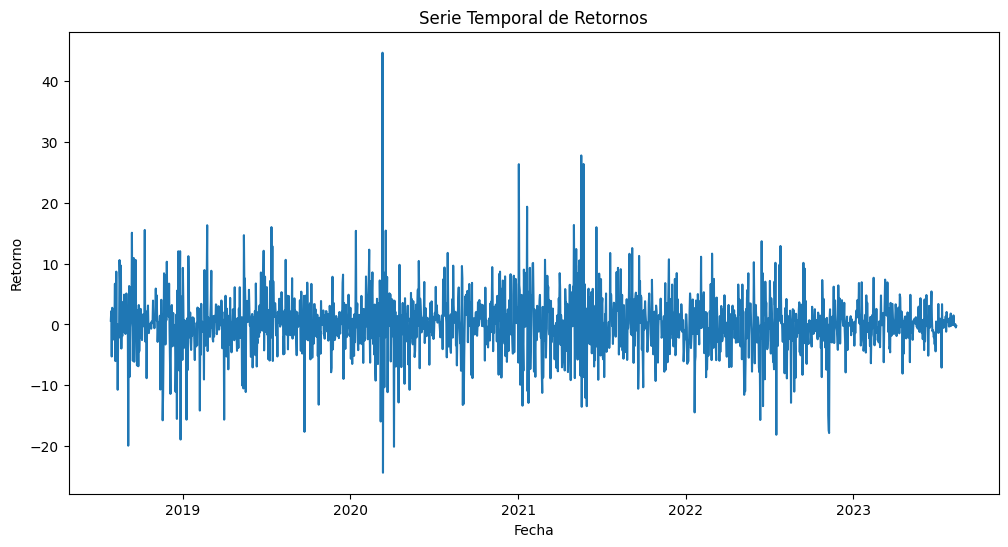

In [18]:
time_series_plot(data['ethereum']['Open time'], data['ethereum']['Strategy_returns'])

Se observa una serie temporal de retornos con media que tiende a 0. La estrategia logro capitalizarse durante la crisis del coronavirus en marzo del 2020 que afecto severamente a los mercados

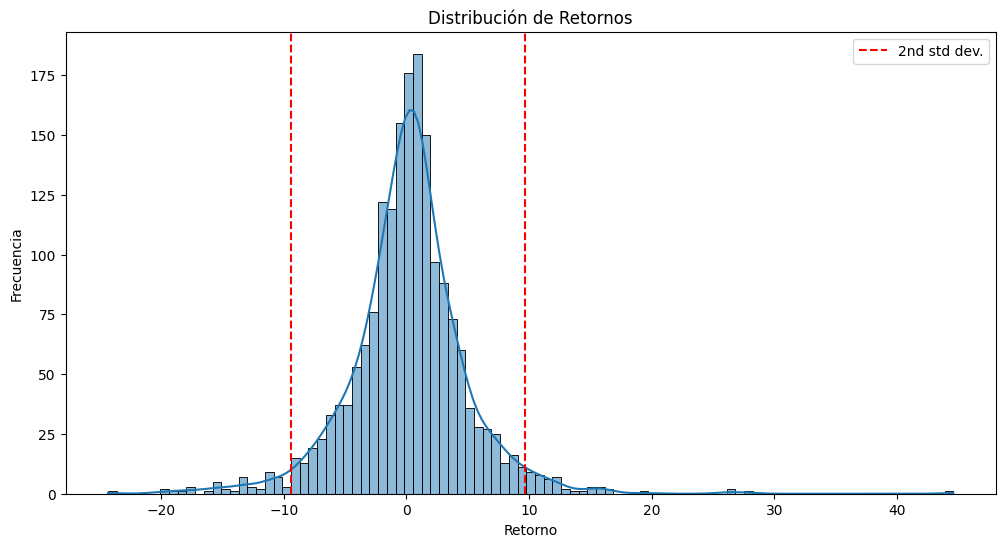

In [19]:
distribution_plot(data['ethereum']['Strategy_returns'])

Se observa una distribucion normal de los retornos de la estrategia con una asimetría positiva, es decir que hay mas presencia de valores atipicos positivos que negativos. Los valores que estan por fuera de la segunda desviacion estandar son considerados outliers

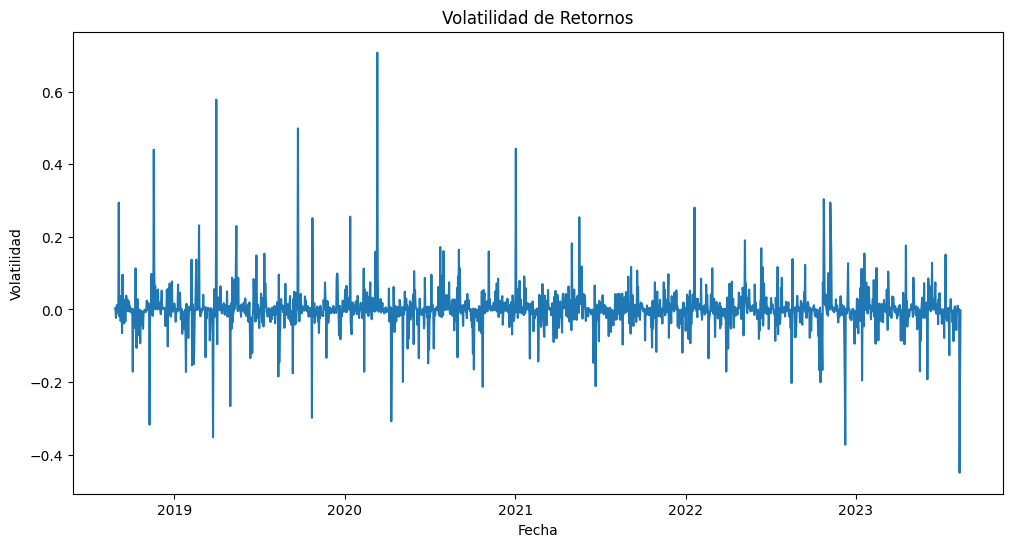

In [20]:
volatility_plot(data['ethereum']['Open time'], data['ethereum']['Strategy_returns'])

Se observa una serie temporal de retornos de la volatilidad en donde la media tiende a 0 y se ven valores atipicos muy grandes. Tambien se observa un fenomeno de clustering, es decir que hay periodos en donde los valores de volatilidad tienden a estar cercanos entre si (ya sea baja o alta volatilidad).

<Figure size 1200x600 with 0 Axes>

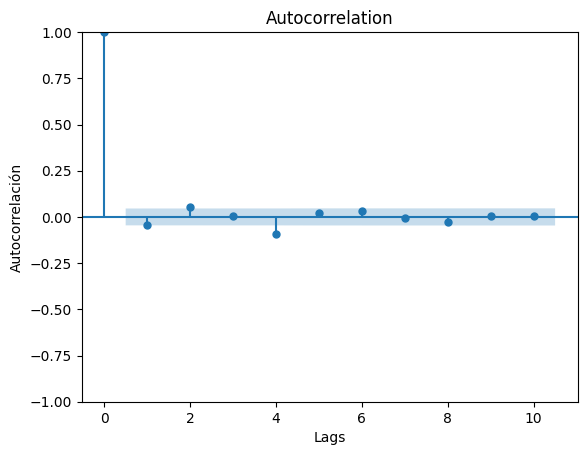

In [21]:
autocorrelation_plot(data['ethereum']['Strategy_returns'])

En este grafico se evidencia que el primero, segundo y cuarto lag de un retorno de la estrategia tienen una correlacion significativa con el ultimo valor registrado. Esto puede ser util para buscar patrones estacionales

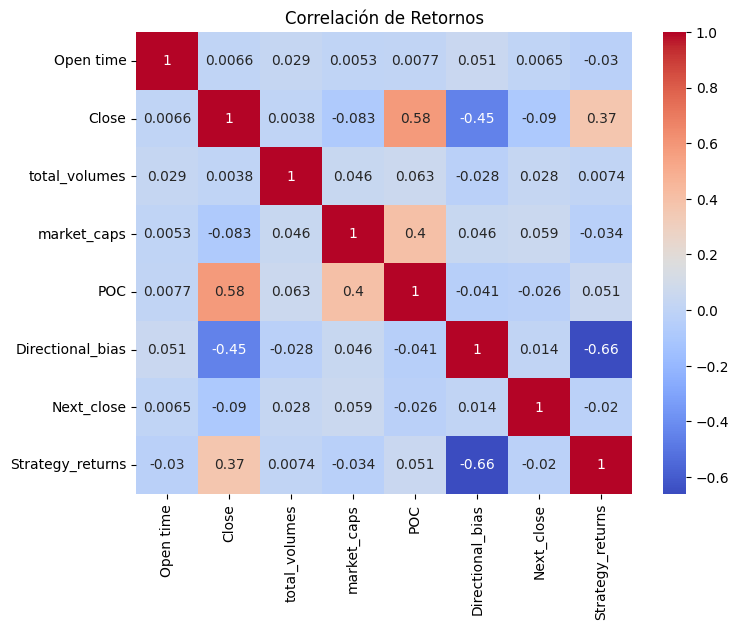

In [22]:
correlation_matrix_plot(data['ethereum'])

Se observa una matriz de correlacion en donde 'Close', 'POC' y 'market_caps' tienen una correlacion positiva significativa. Por otro lado 'Strategy_returns' y 'Directional_bias' tienen una correlacion negativa significativa

# Binancecoin

In [23]:
# Información sobre las columnas
data['binancecoin'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1843 entries, 0 to 1842
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Open time         1843 non-null   datetime64[ns]
 1   Close             1843 non-null   float64       
 2   total_volumes     1843 non-null   float64       
 3   market_caps       1843 non-null   float64       
 4   POC               1843 non-null   float64       
 5   Directional_bias  1843 non-null   int64         
 6   Next_close        1843 non-null   float64       
 7   Strategy_returns  1843 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 115.3 KB


In [24]:
# Evalua la presencia de duplicados
data['binancecoin'].duplicated().sum()

0

In [25]:
# Genera estadisticas descriptivas
data['binancecoin'].describe()

,Open time,Close,total_volumes,market_caps,POC,Directional_bias,Next_close,Strategy_returns
count,1843,1843.000000,1843.000000,1843.000000,1843.000000,1843.000000,1843.000000,1843.000000
mean,2021-02-03 00:00:00,0.285320,13.449891,0.320622,0.273572,0.450353,0.282728,0.471640
min,2018-07-28 00:00:00,-44.115872,-97.123263,-42.335128,-27.405072,0.000000,-44.115872,-34.078916
25%,2019-10-31 12:00:00,-1.840274,-17.093611,-1.817237,-1.738718,0.000000,-1.840274,-1.736931
50%,2021-02-03 00:00:00,0.148896,-0.641002,0.113930,0.122249,0.000000,0.148810,0.343446
75%,2022-05-09 12:00:00,2.432335,18.849117,2.369046,2.399403,1.000000,2.417981,2.432143
max,2023-08-13 00:00:00,70.301636,2149.021997,81.868570,47.261844,1.000000,70.301636,70.301636
std,NaN,5.159829,103.826832,5.394349,4.912948,0.497664,5.158730,5.144891


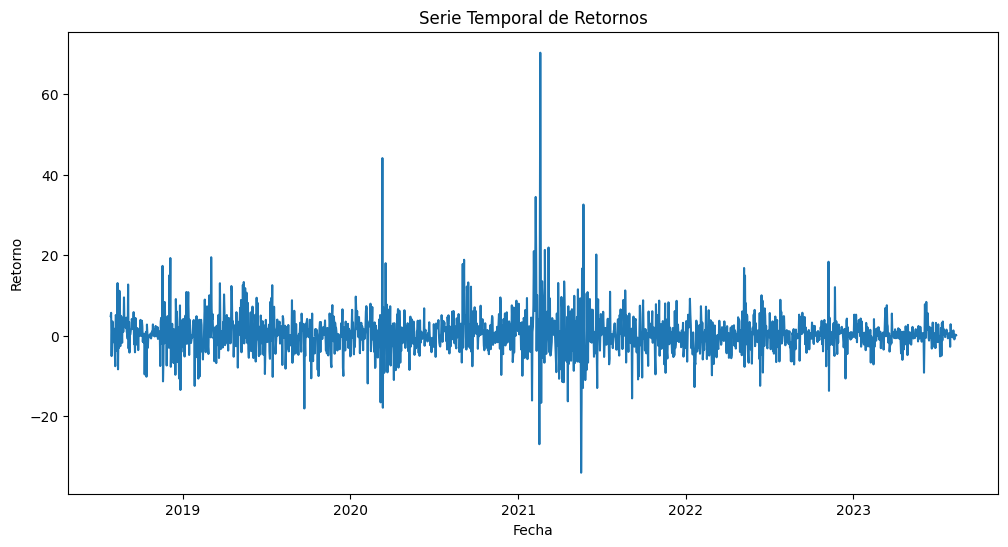

In [26]:
time_series_plot(data['binancecoin']['Open time'], data['binancecoin']['Strategy_returns'])

Se observa una serie temporal de retornos con media que tiende a 0. La estrategia logro capitalizarse durante la crisis del coronavirus en marzo del 2020 que afecto severamente a los mercados

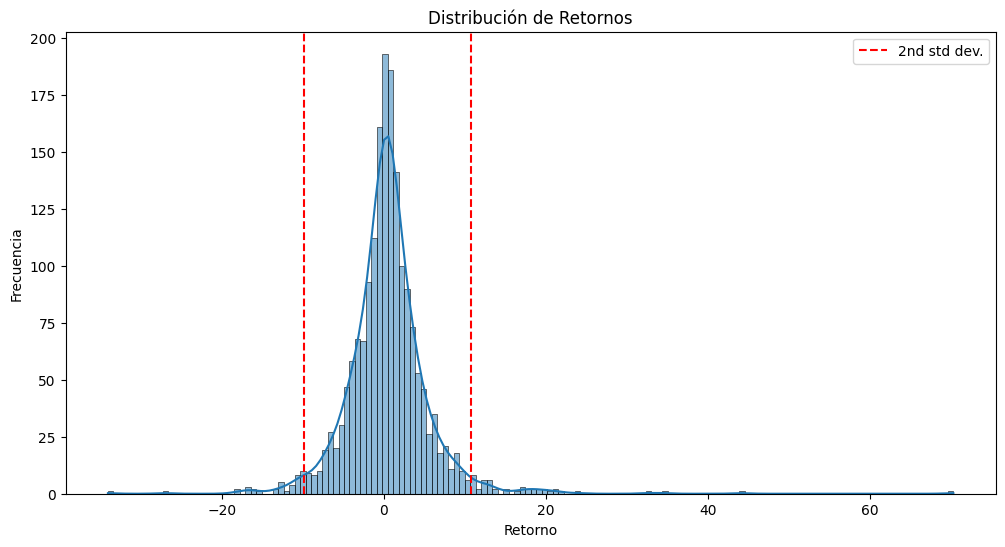

In [27]:
distribution_plot(data['binancecoin']['Strategy_returns'])

Se observa una distribucion normal de los retornos de la estrategia con una asimetría positiva, es decir que hay mas presencia de valores atipicos positivos que negativos. Los valores que estan por fuera de la segunda desviacion estandar son considerados outliers

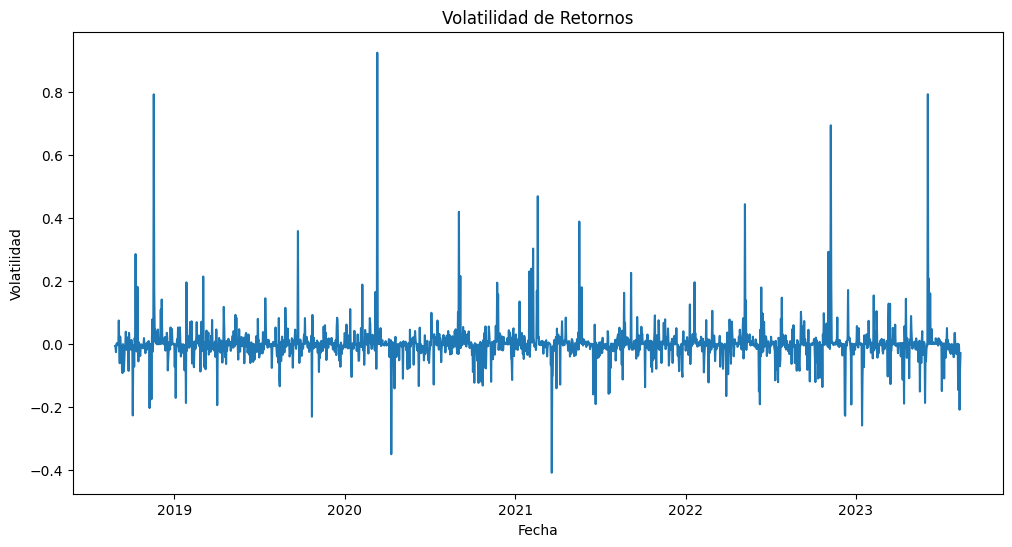

In [28]:
volatility_plot(data['binancecoin']['Open time'], data['binancecoin']['Strategy_returns'])

Se observa una serie temporal de retornos de la volatilidad en donde la media tiende a 0 y se ven valores atipicos muy grandes. Tambien se observa un fenomeno de clustering, es decir que hay periodos en donde los valores de volatilidad tienden a estar cercanos entre si (ya sea baja o alta volatilidad).

<Figure size 1200x600 with 0 Axes>

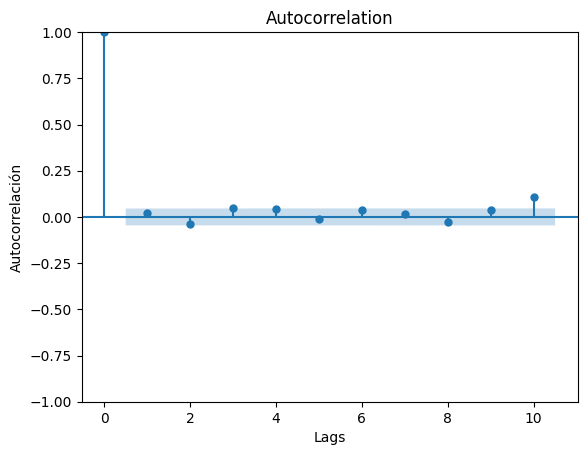

In [29]:
autocorrelation_plot(data['binancecoin']['Strategy_returns'])

En este grafico se evidencia que el segundo, tercero y decimo lag de un retorno de la estrategia tienen una correlacion significativa con el ultimo valor registrado. Esto puede ser util para buscar patrones estacionales

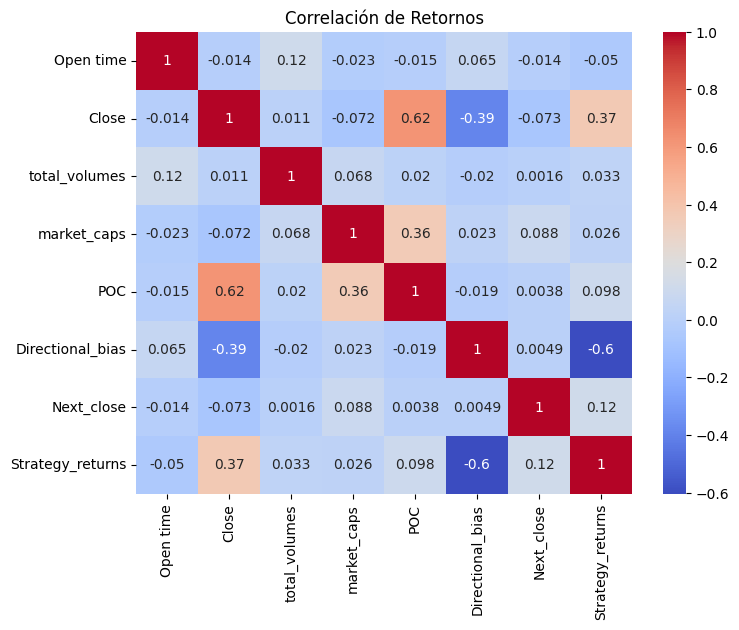

In [30]:
correlation_matrix_plot(data['binancecoin'])

Se observa una matriz de correlacion en donde 'Close', 'POC' y 'market_caps' tienen una correlacion positiva significativa. Por otro lado 'Strategy_returns' y 'Directional_bias' tienen una correlacion negativa significativa

# Ripple

In [31]:
# Informacion sobre las columnas
data['ripple'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1843 entries, 0 to 1842
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Open time         1843 non-null   datetime64[ns]
 1   Close             1843 non-null   float64       
 2   total_volumes     1843 non-null   float64       
 3   market_caps       1843 non-null   float64       
 4   POC               1843 non-null   float64       
 5   Directional_bias  1843 non-null   int64         
 6   Next_close        1843 non-null   float64       
 7   Strategy_returns  1843 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 115.3 KB


In [32]:
# Evalua la presencia de duplicados
data['ripple'].duplicated().sum()

0

In [33]:
# Genera estadisticas descriptivas
data['ripple'].describe()

,Open time,Close,total_volumes,market_caps,POC,Directional_bias,Next_close,Strategy_returns
count,1843,1843.000000,1843.000000,1843.000000,1843.000000,1843.000000,1843.000000,1843.000000
mean,2021-02-03 00:00:00,0.192701,7.564062,0.194165,0.163897,0.483451,0.192701,0.178392
min,2018-07-28 00:00:00,-42.222222,-94.407248,-40.669929,-32.931838,0.000000,-42.222222,-57.142857
25%,2019-10-31 12:00:00,-2.643223,-16.720075,-2.047888,-2.077666,0.000000,-2.643223,-2.500000
50%,2021-02-03 00:00:00,0.000000,-2.897217,-0.020345,-0.042799,0.000000,0.000000,0.000000
75%,2022-05-09 12:00:00,2.564103,16.734694,1.946194,2.028197,1.000000,2.564103,2.702703
max,2023-08-13 00:00:00,74.468085,1733.764988,72.822314,65.392277,1.000000,74.468085,74.468085
std,NaN,6.086512,61.627299,5.816072,5.561617,0.499862,6.086512,6.086948


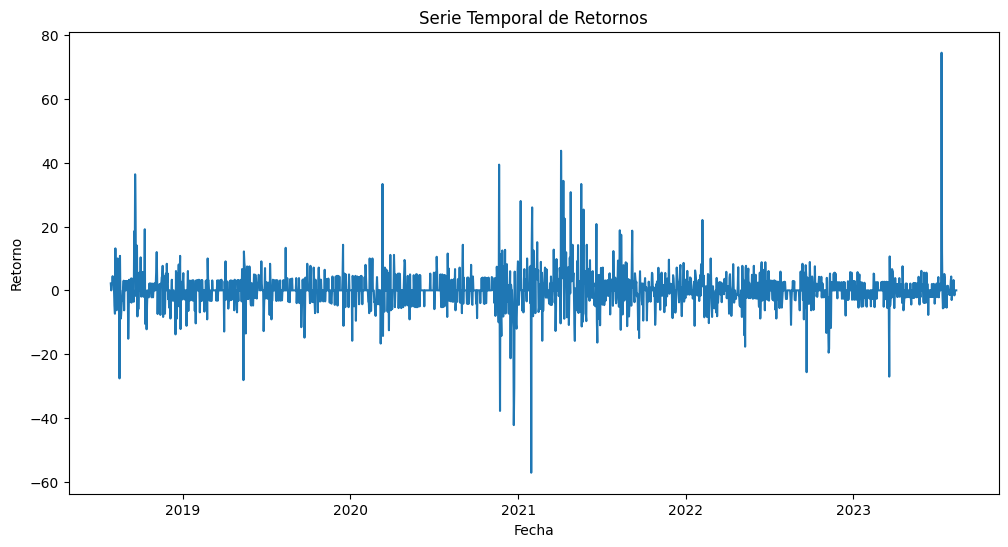

In [34]:
time_series_plot(data['ripple']['Open time'], data['ripple']['Strategy_returns'])

Se observa una serie temporal de retornos con media que tiende a 0. La estrategia logro capitalizarse durante la crisis del coronavirus en marzo del 2020 que afecto severamente a los mercados. Se evidencia un aumento y clustering de la magnitud de los retornos durante finales de 2020 y todo el 2021.

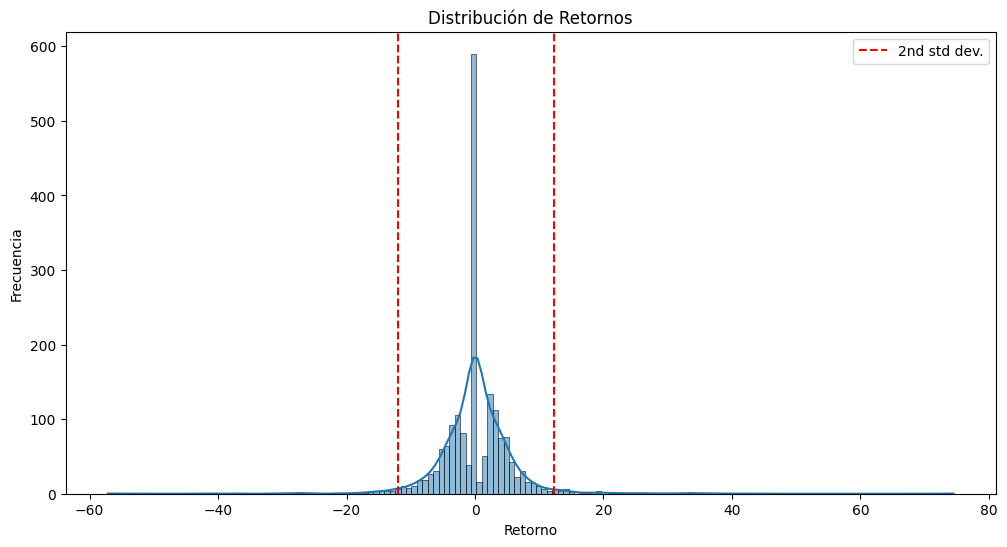

In [35]:
distribution_plot(data['ripple']['Strategy_returns'])

Se observa una distribucion normal de los retornos de la estrategia con una asimetría positiva, es decir que hay mas presencia de valores atipicos positivos que negativos. Los valores que estan por fuera de la segunda desviacion estandar son considerados outliers

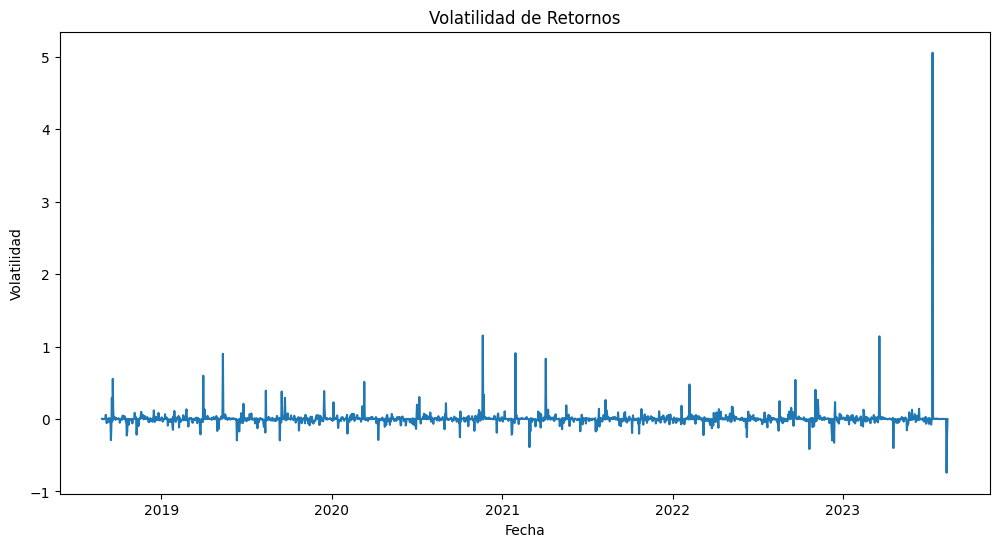

In [36]:
volatility_plot(data['ripple']['Open time'], data['ripple']['Strategy_returns'])

Se observa una serie temporal de retornos de la volatilidad en donde la media tiende a 0 y se ven valores atipicos muy grandes. Tambien se observa un fenomeno de clustering, es decir que hay periodos en donde los valores de volatilidad tienden a estar cercanos entre si (ya sea baja o alta volatilidad).

<Figure size 1200x600 with 0 Axes>

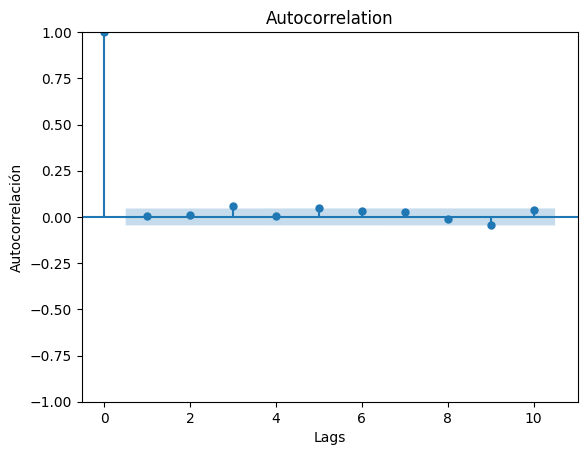

In [37]:
autocorrelation_plot(data['ripple']['Strategy_returns'])

En este grafico se evidencia que el tercero y noveno lag de un retorno de la estrategia tienen una correlacion significativa con el ultimo valor registrado. Esto puede ser util para buscar patrones estacionales

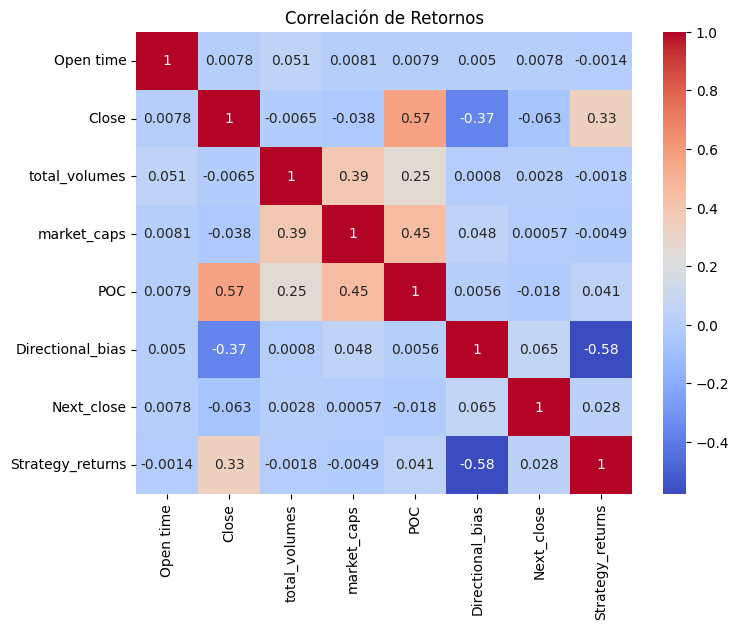

In [38]:
correlation_matrix_plot(data['ripple'])

Se observa una matriz de correlacion en donde 'Close', 'POC', 'market_caps' y 'total_volumes' tienen una correlacion positiva significativa. Por otro lado 'Strategy_returns' y 'Directional_bias' tienen una correlacion negativa significativa

# Cardano

In [39]:
# Informacion de las columnas
data['cardano'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1843 entries, 0 to 1842
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Open time         1843 non-null   datetime64[ns]
 1   Close             1843 non-null   float64       
 2   total_volumes     1843 non-null   float64       
 3   market_caps       1843 non-null   float64       
 4   POC               1843 non-null   float64       
 5   Directional_bias  1843 non-null   int64         
 6   Next_close        1843 non-null   float64       
 7   Strategy_returns  1843 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 115.3 KB


In [40]:
# Evalua la presencia de duplicados
data['cardano'].duplicated().sum()

0

In [41]:
# Genera estadisticas descriptivas
data['cardano'].describe()

,Open time,Close,total_volumes,market_caps,POC,Directional_bias,Next_close,Strategy_returns
count,1843,1843.000000,1843.000000,1843.000000,1843.000000,1843.000000,1843.000000,1843.000000
mean,2021-02-03 00:00:00,0.261564,6.061604,0.175401,0.175431,0.502442,0.264756,-0.219675
min,2018-07-28 00:00:00,-50.000000,-66.446425,-41.035704,-23.667588,0.000000,-50.000000,-50.000000
25%,2019-10-31 12:00:00,-1.242667,-18.717486,-2.539071,-2.484335,0.000000,-1.204994,-1.474210
50%,2021-02-03 00:00:00,0.000000,-2.730542,0.068312,0.045228,1.000000,0.000000,0.000000
75%,2022-05-09 12:00:00,0.847458,19.623336,2.488329,2.435159,1.000000,0.847458,0.691761
max,2023-08-13 00:00:00,50.000000,574.855789,30.766268,33.323810,1.000000,50.000000,50.000000
std,NaN,6.882136,41.207665,5.255783,5.378375,0.500130,6.880649,6.882237


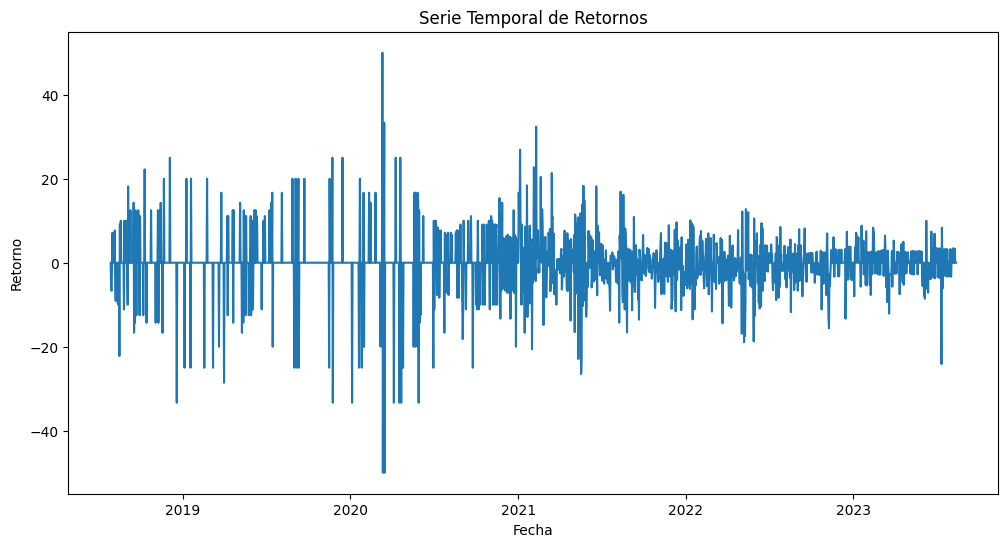

In [42]:
time_series_plot(data['cardano']['Open time'], data['cardano']['Strategy_returns'])

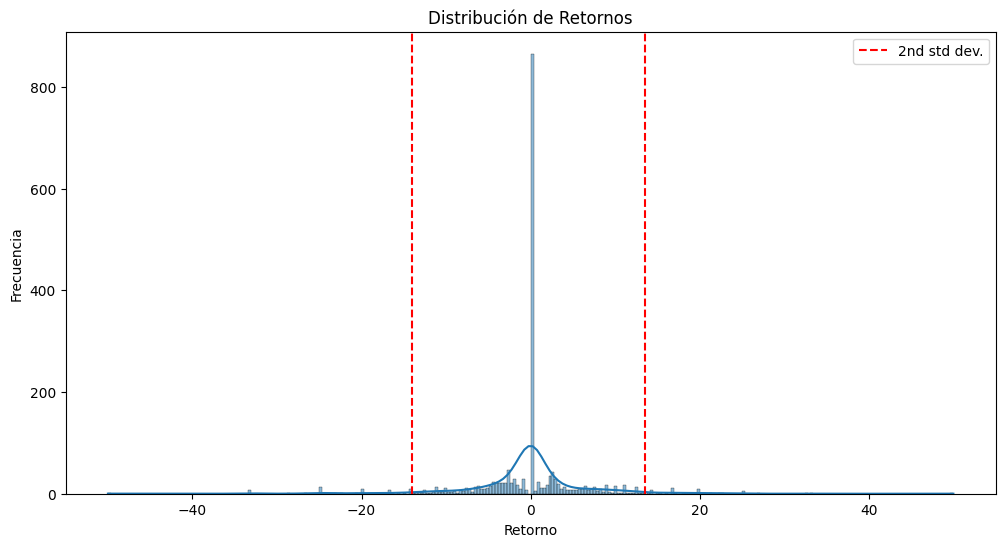

In [43]:
distribution_plot(data['cardano']['Strategy_returns'])

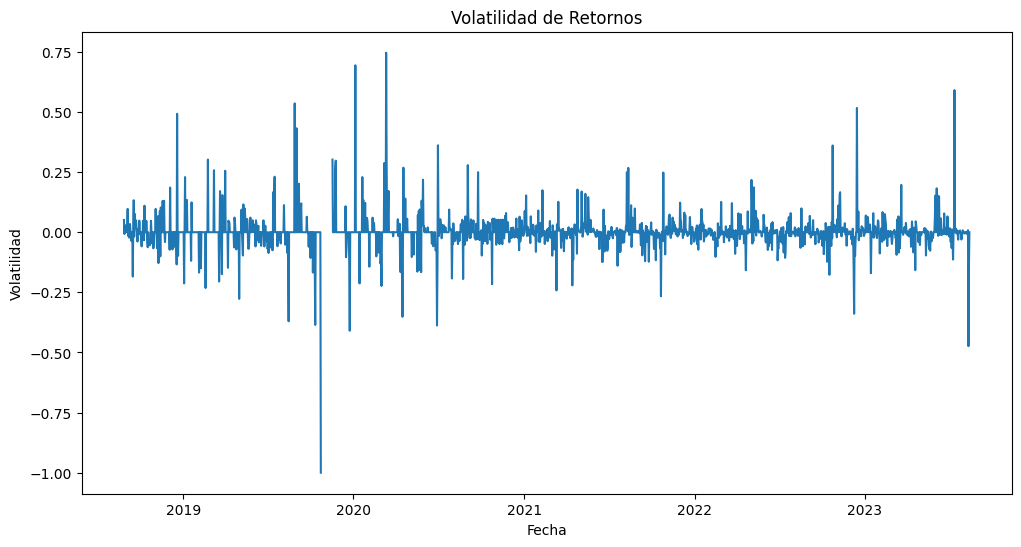

In [44]:
volatility_plot(data['cardano']['Open time'], data['cardano']['Strategy_returns'])

<Figure size 1200x600 with 0 Axes>

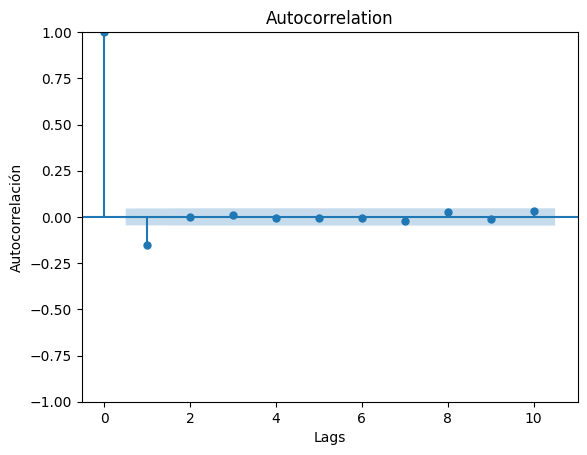

In [45]:
autocorrelation_plot(data['cardano']['Strategy_returns'])

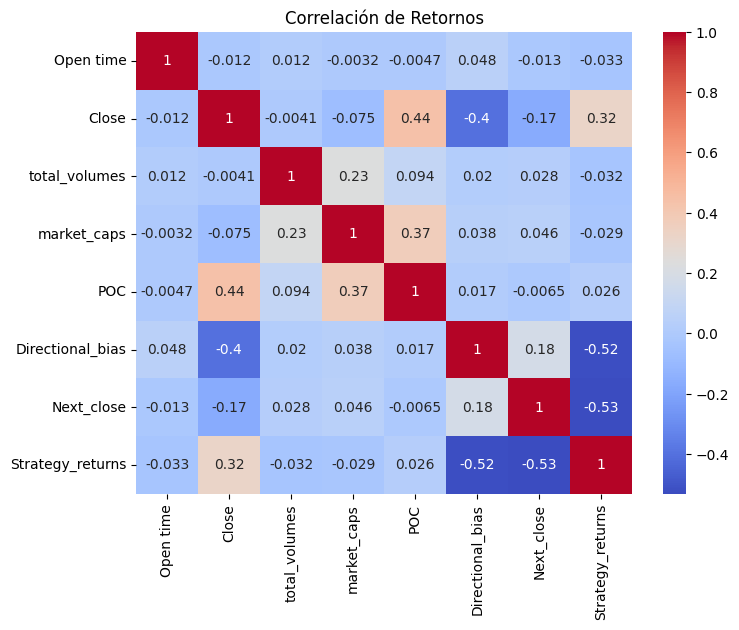

In [46]:
correlation_matrix_plot(data['cardano'])

# Tron

In [47]:
# Informacion sobre las columnas
data['tron'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1843 entries, 0 to 1842
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Open time         1843 non-null   datetime64[ns]
 1   Close             1843 non-null   float64       
 2   total_volumes     1843 non-null   float64       
 3   market_caps       1843 non-null   float64       
 4   POC               1843 non-null   float64       
 5   Directional_bias  1843 non-null   int64         
 6   Next_close        1843 non-null   float64       
 7   Strategy_returns  1843 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 115.3 KB


In [48]:
# Evalua la presencia de duplicados
data['tron'].duplicated().sum()

0

In [49]:
# Genera estadisticas descriptivas
data['tron'].describe()

,Open time,Close,total_volumes,market_caps,POC,Directional_bias,Next_close,Strategy_returns
count,1843,1843.000000,1843.000000,1843.000000,1843.000000,1843.000000,1843.000000,1843.000000
mean,2021-02-03 00:00:00,0.871910,3.859417,0.188178,0.154220,0.533370,0.871910,-0.909727
min,2018-07-28 00:00:00,-50.000000,-66.410167,-41.812149,-30.612245,0.000000,-50.000000,-100.000000
25%,2019-10-31 12:00:00,0.000000,-12.419303,-1.962159,-1.661130,0.000000,0.000000,-0.000000
50%,2021-02-03 00:00:00,0.000000,-1.328632,0.141341,0.212857,1.000000,0.000000,0.000000
75%,2022-05-09 12:00:00,0.000000,12.322533,2.077992,2.012957,1.000000,0.000000,0.000000
max,2023-08-13 00:00:00,100.000000,426.913767,47.527326,23.050847,1.000000,100.000000,50.000000
std,NaN,13.950263,33.944977,5.110094,4.741314,0.499021,13.950263,13.947847


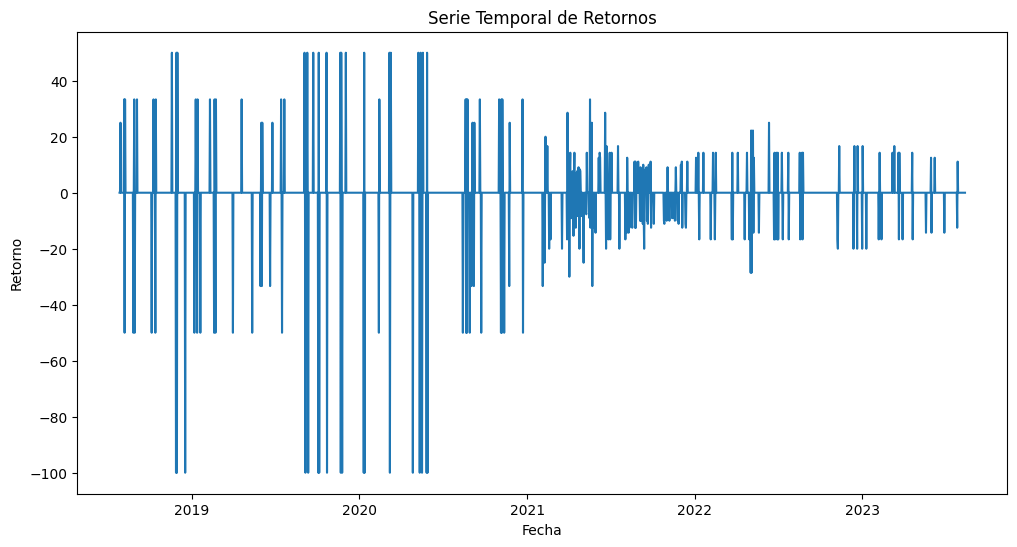

In [50]:
time_series_plot(data['tron']['Open time'], data['tron']['Strategy_returns'])

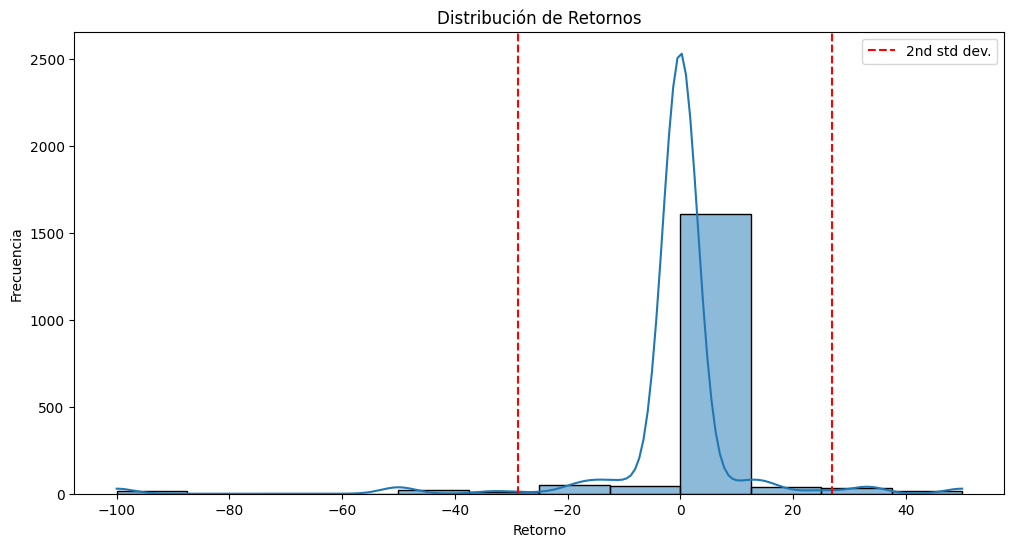

In [51]:
distribution_plot(data['tron']['Strategy_returns'])

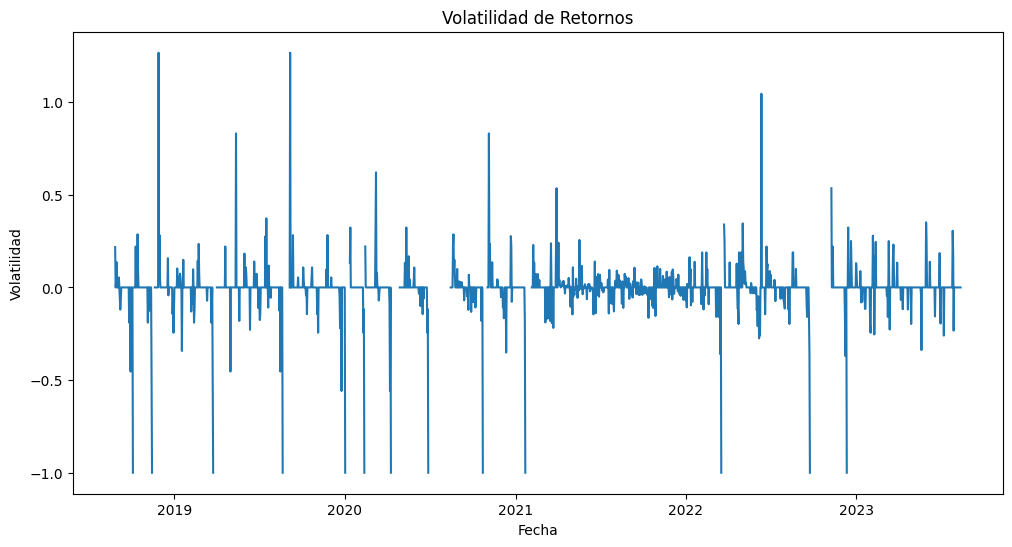

In [52]:
volatility_plot(data['tron']['Open time'], data['tron']['Strategy_returns'])

<Figure size 1200x600 with 0 Axes>

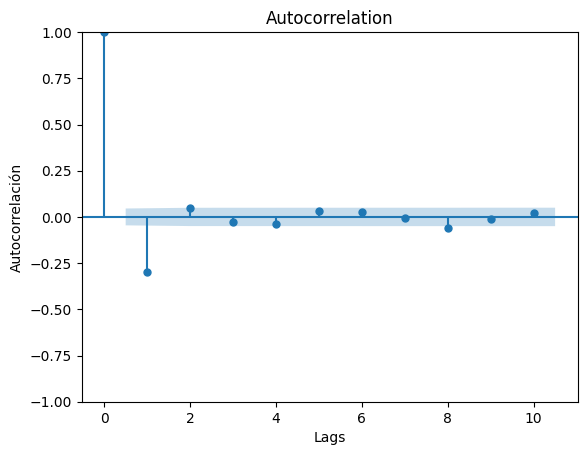

In [53]:
autocorrelation_plot(data['tron']['Strategy_returns'])

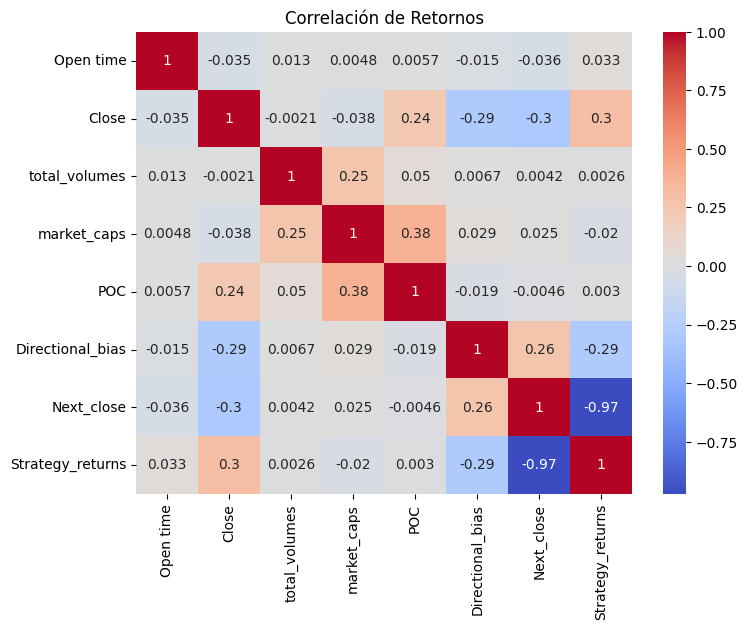

In [54]:
correlation_matrix_plot(data['tron'])

# Litecoin

In [55]:
# Informacion sobre las columnas
data['litecoin'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1843 entries, 0 to 1842
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Open time         1843 non-null   datetime64[ns]
 1   Close             1843 non-null   float64       
 2   total_volumes     1843 non-null   float64       
 3   market_caps       1843 non-null   float64       
 4   POC               1843 non-null   float64       
 5   Directional_bias  1843 non-null   int64         
 6   Next_close        1843 non-null   float64       
 7   Strategy_returns  1843 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 115.3 KB


In [56]:
# Evalua la presencia de duplicados
data['litecoin'].duplicated().sum()

0

In [57]:
# Genera estadisticas descriptivas
data['litecoin'].describe()

,Open time,Close,total_volumes,market_caps,POC,Directional_bias,Next_close,Strategy_returns
count,1843,1843.000000,1843.000000,1843.000000,1843.000000,1843.000000,1843.000000,1843.000000
mean,2021-02-03 00:00:00,0.131048,4.891167,0.142980,0.131020,0.467716,0.131380,0.250689
min,2018-07-28 00:00:00,-38.532866,-94.318309,-38.010682,-37.486976,0.000000,-38.532866,-36.754201
25%,2019-10-31 12:00:00,-2.441319,-13.598724,-2.361978,-2.187477,0.000000,-2.441319,-2.095735
50%,2021-02-03 00:00:00,0.015209,-1.476927,0.054331,0.167364,0.000000,0.021626,0.306178
75%,2022-05-09 12:00:00,2.494952,14.896346,2.548650,2.603841,1.000000,2.494952,2.794465
max,2023-08-13 00:00:00,30.149589,930.735683,28.563169,27.096774,1.000000,30.149589,38.532866
std,NaN,5.122059,44.601105,5.067523,5.071047,0.499092,5.122046,5.117592


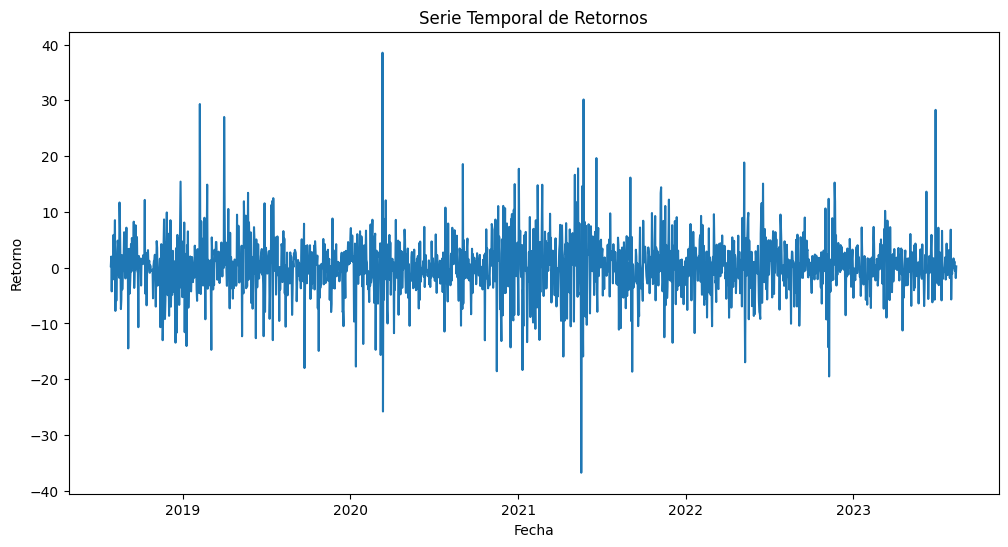

In [58]:
time_series_plot(data['litecoin']['Open time'], data['litecoin']['Strategy_returns'])

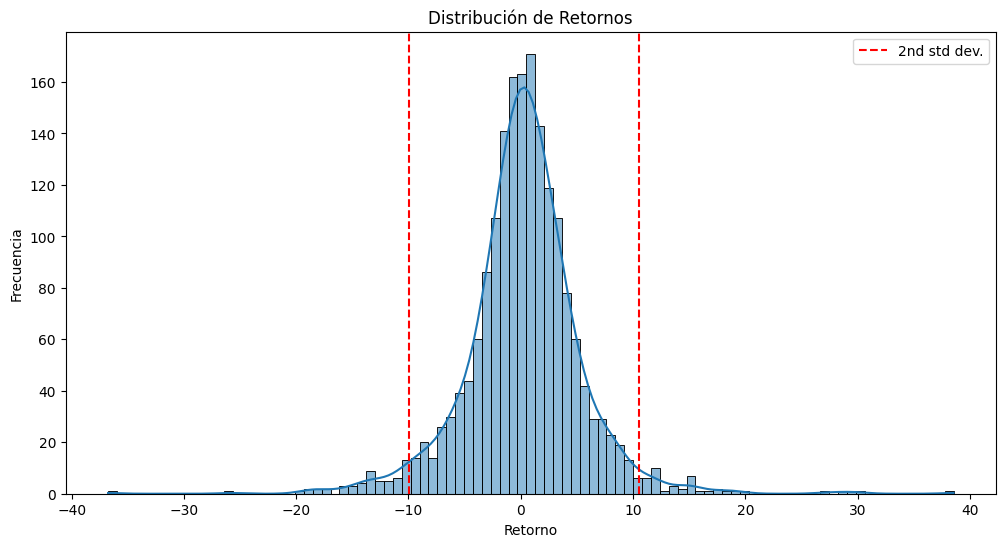

In [59]:
distribution_plot(data['litecoin']['Strategy_returns'])

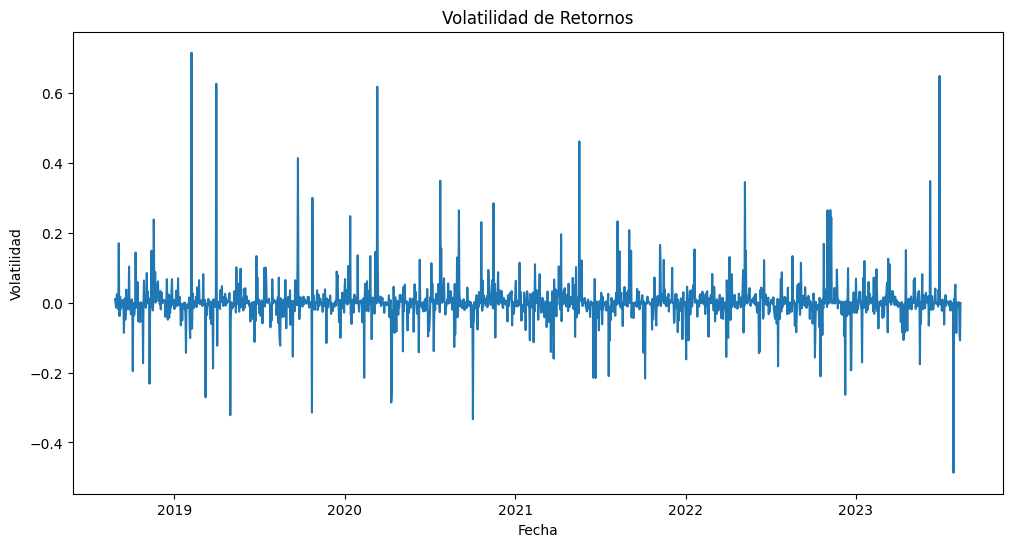

In [60]:
volatility_plot(data['litecoin']['Open time'], data['litecoin']['Strategy_returns'])

<Figure size 1200x600 with 0 Axes>

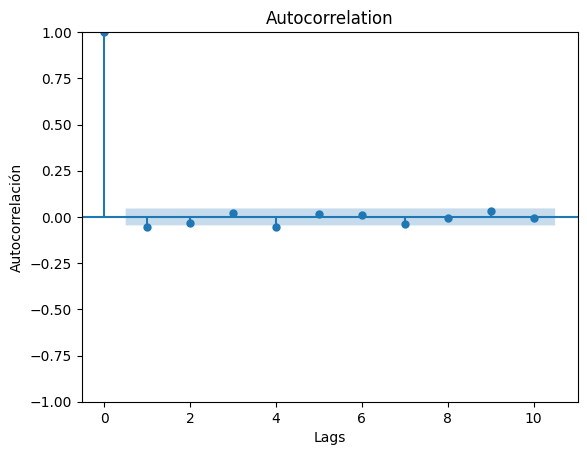

In [61]:
autocorrelation_plot(data['litecoin']['Strategy_returns'])

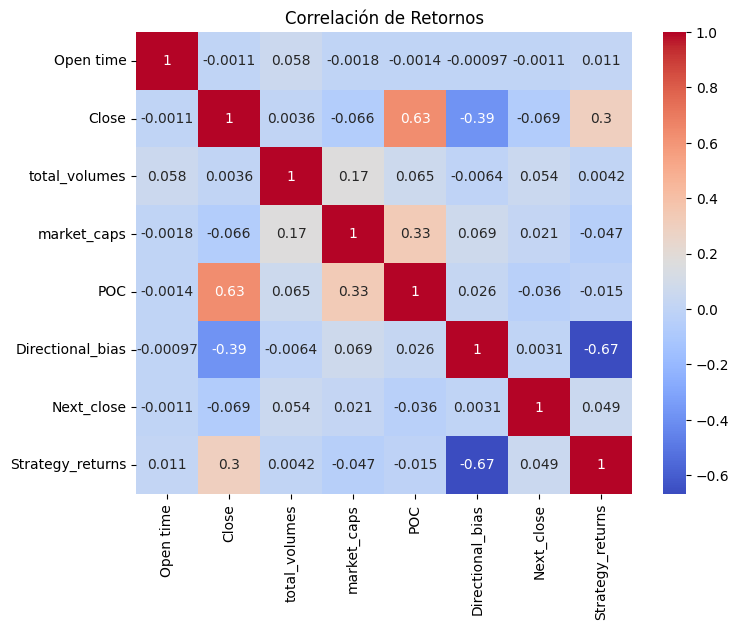

In [62]:
correlation_matrix_plot(data['litecoin'])

# Stellar

In [63]:
# Informacion sobre las columnas
data['stellar'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1843 entries, 0 to 1842
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Open time         1843 non-null   datetime64[ns]
 1   Close             1843 non-null   float64       
 2   total_volumes     1843 non-null   float64       
 3   market_caps       1843 non-null   float64       
 4   POC               1843 non-null   float64       
 5   Directional_bias  1843 non-null   int64         
 6   Next_close        1843 non-null   float64       
 7   Strategy_returns  1843 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 115.3 KB


In [64]:
# Evalua la presencia de duplicados
data['stellar'].duplicated().sum()

0

In [65]:
# Genera estadisticas descriptivas
data['stellar'].describe()

,Open time,Close,total_volumes,market_caps,POC,Directional_bias,Next_close,Strategy_returns
count,1843,1843.000000,1843.000000,1843.000000,1843.000000,1843.000000,1843.000000,1843.000000
mean,2021-02-03 00:00:00,0.179575,6.256737,0.120675,0.123839,0.494845,0.179575,-0.090531
min,2018-07-28 00:00:00,-40.000000,-71.895517,-35.817760,-28.384213,0.000000,-40.000000,-40.000000
25%,2019-10-31 12:00:00,0.000000,-17.022014,-2.384445,-2.476843,0.000000,0.000000,0.000000
50%,2021-02-03 00:00:00,0.000000,-2.014980,-0.027234,-0.047727,0.000000,0.000000,0.000000
75%,2022-05-09 12:00:00,0.000000,17.444184,2.138316,2.256626,1.000000,0.000000,0.000000
max,2023-08-13 00:00:00,78.947368,2382.878219,78.813505,97.533408,1.000000,78.947368,78.947368
std,NaN,6.870474,67.109847,5.543687,6.035274,0.500109,6.870474,6.872225


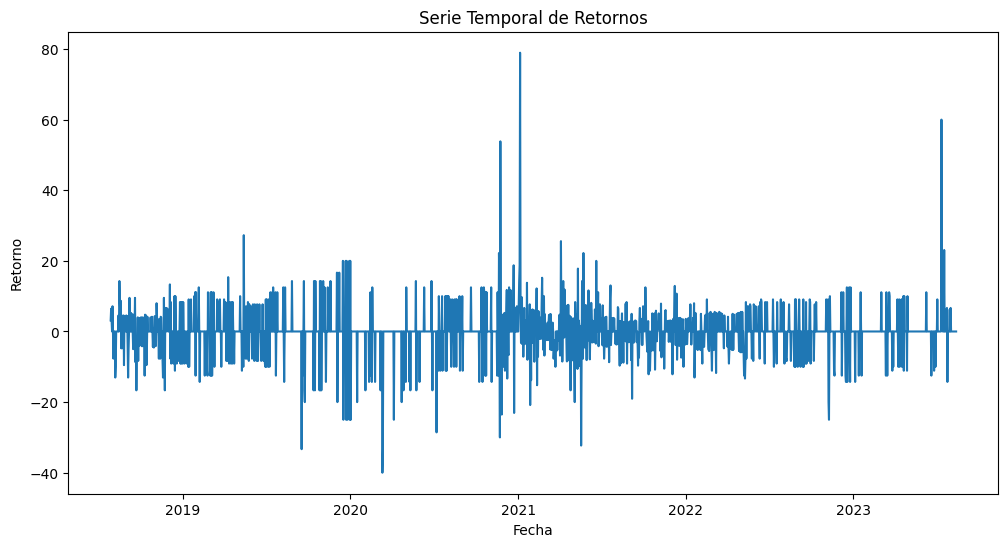

In [66]:
time_series_plot(data['stellar']['Open time'], data['stellar']['Strategy_returns'])

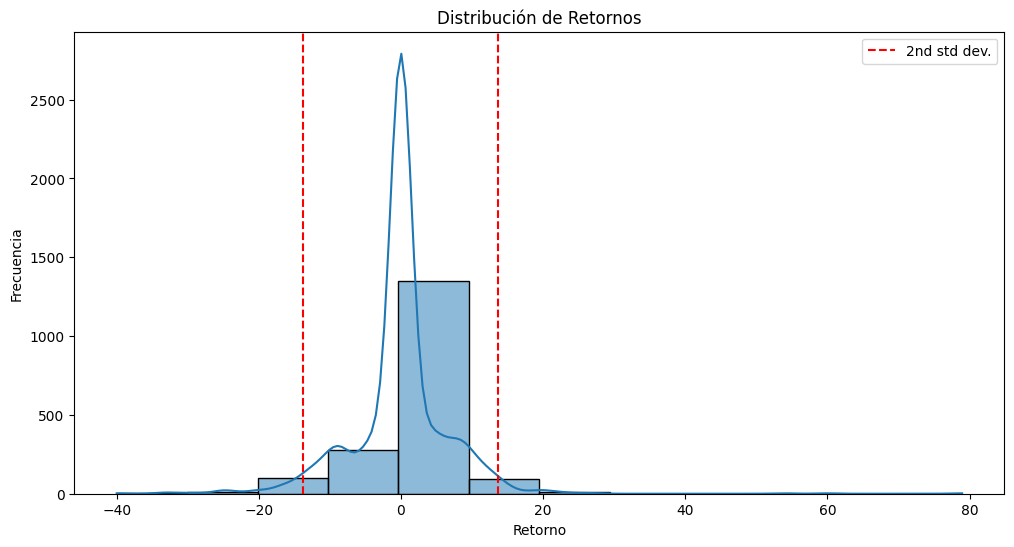

In [67]:
distribution_plot(data['stellar']['Strategy_returns'])

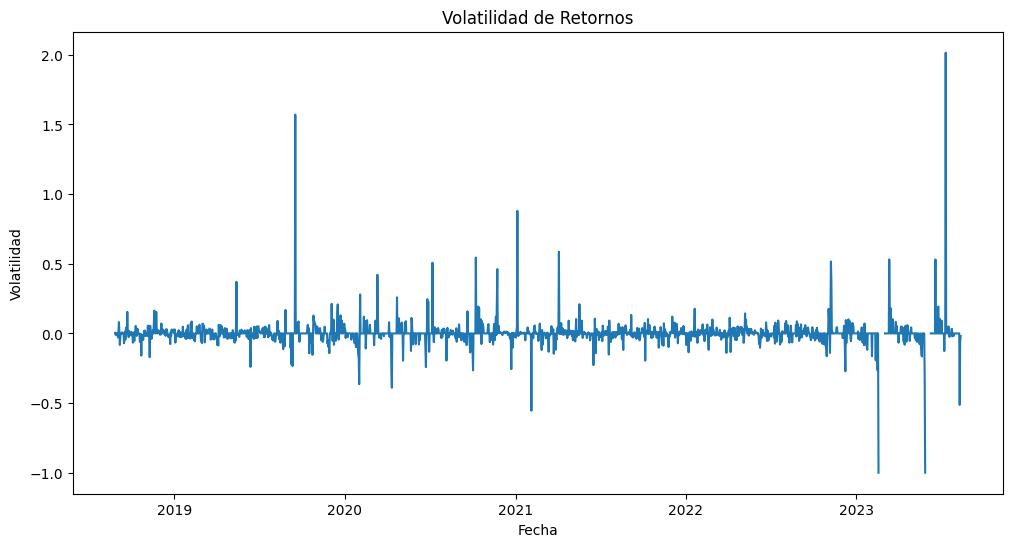

In [68]:
volatility_plot(data['stellar']['Open time'], data['stellar']['Strategy_returns'])

<Figure size 1200x600 with 0 Axes>

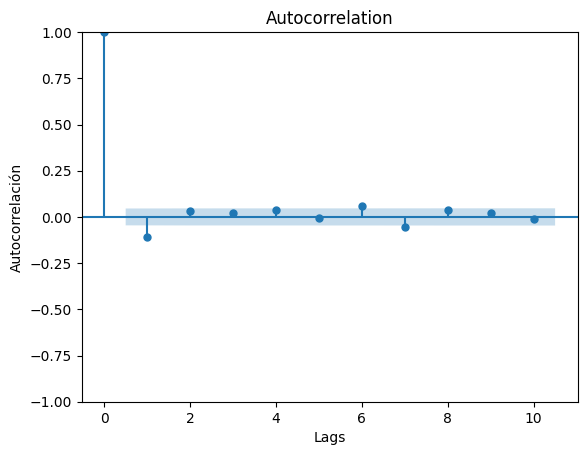

In [69]:
autocorrelation_plot(data['stellar']['Strategy_returns'])

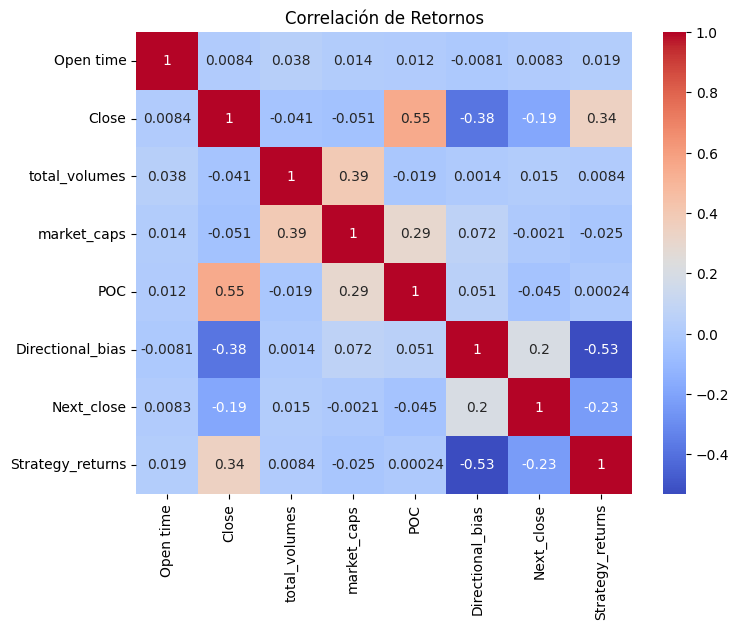

In [70]:
correlation_matrix_plot(data['stellar'])

# Ethereum classic

In [71]:
# Informacion sobre las columnas
data['ethereum_classic']

,Open time,Close,total_volumes,market_caps,POC,Directional_bias,Next_close,Strategy_returns
0,2018-07-28,-0.351494,-42.573121,1.606111,2.397065,0,-0.705467,0.705467
1,2018-07-29,-0.705467,-11.095378,0.224913,-0.276658,0,1.361753,1.361753
2,2018-07-30,1.361753,74.049800,-0.544561,0.773590,0,-5.490654,5.490654
3,2018-07-31,-5.490654,-9.071421,1.848361,-1.969423,1,-4.326329,-4.326329
4,2018-08-01,-4.326329,13.225647,-5.573806,-4.073183,1,-3.552972,-3.552972
...,...,...,...,...,...,...,...,...
1838,2023-08-09,-0.501672,5.017652,1.749640,0.338983,0,-0.616246,0.616246
1839,2023-08-10,-0.616246,-17.816480,-0.548767,0.225225,1,-0.563698,-0.563698
1840,2023-08-11,-0.563698,-17.173591,-0.849197,-0.786517,1,0.510204,0.510204
1841,2023-08-12,0.510204,-17.507616,-0.443249,0.169875,0,-1.128032,1.128032


In [72]:
# Evalua la presencia de duplicados
data['ethereum_classic'].duplicated().sum()

0

In [73]:
# Genera estadisticas descriptivas
data['ethereum_classic'].describe()

,Open time,Close,total_volumes,market_caps,POC,Directional_bias,Next_close,Strategy_returns
count,1843,1843.000000,1843.000000,1843.000000,1843.000000,1843.000000,1843.000000,1843.000000
mean,2021-02-03 00:00:00,0.170378,5.202525,0.248089,0.172317,0.475312,0.170507,0.310887
min,2018-07-28 00:00:00,-43.550835,-72.320267,-64.517884,-31.321227,0.000000,-43.550835,-32.896816
25%,2019-10-31 12:00:00,-2.224814,-14.127692,-2.195666,-2.285062,0.000000,-2.224814,-2.203627
50%,2021-02-03 00:00:00,0.000000,-1.316430,-0.031415,0.002427,0.000000,0.000000,0.263158
75%,2022-05-09 12:00:00,2.365228,14.785668,2.291642,2.355945,1.000000,2.365228,2.412297
max,2023-08-13 00:00:00,42.987391,632.842228,176.473815,51.909864,1.000000,42.987391,43.550835
std,NaN,5.874375,42.771857,7.282672,5.865609,0.499526,5.874366,5.868608


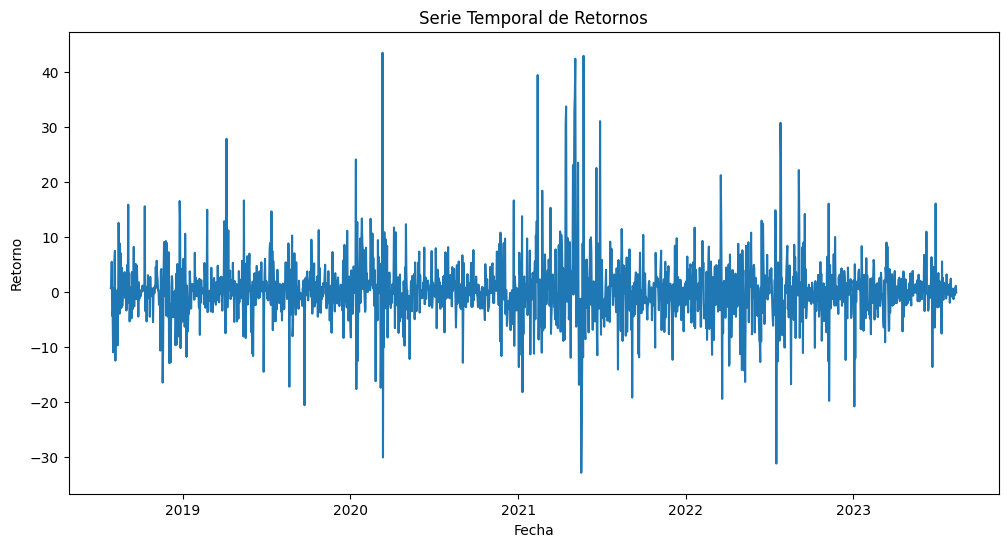

In [74]:
time_series_plot(data['ethereum_classic']['Open time'], data['ethereum_classic']['Strategy_returns'])

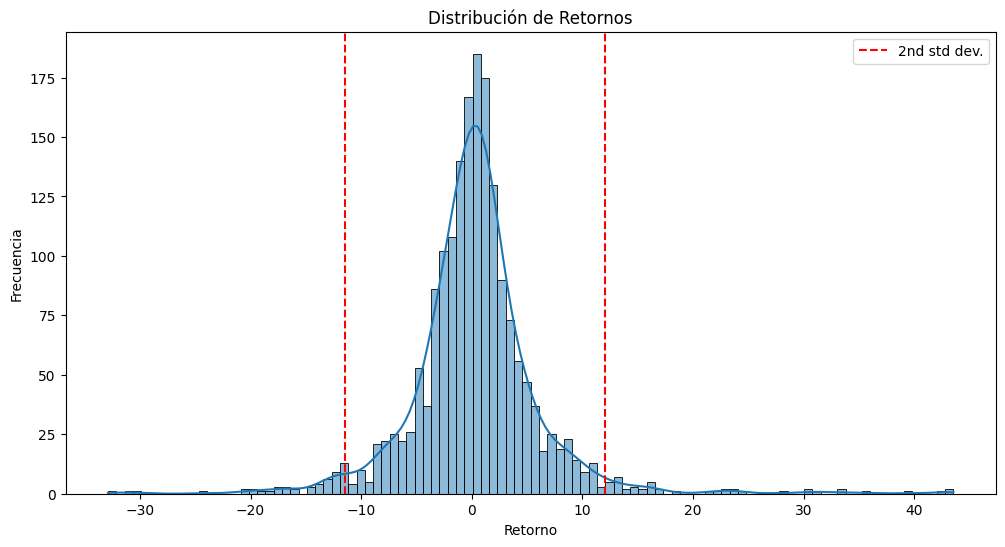

In [75]:
distribution_plot(data['ethereum_classic']['Strategy_returns'])

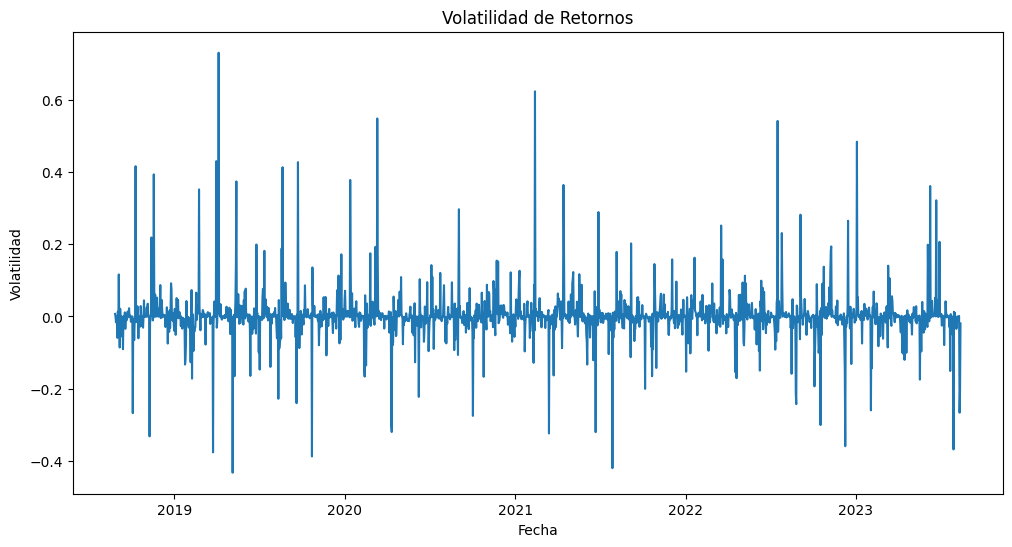

In [76]:
volatility_plot(data['ethereum_classic']['Open time'], data['ethereum_classic']['Strategy_returns'])

<Figure size 1200x600 with 0 Axes>

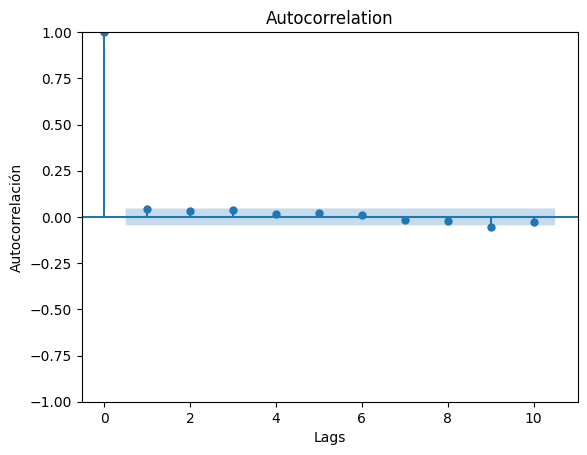

In [77]:
autocorrelation_plot(data['ethereum_classic']['Strategy_returns'])

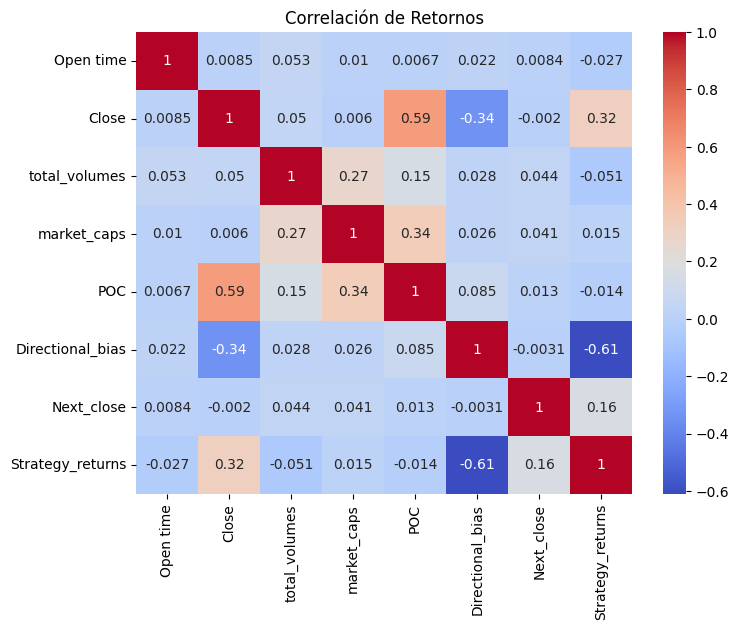

In [78]:
correlation_matrix_plot(data['ethereum_classic'])

# Vechain

En el dataframe de vechain se observa que tiene una longitud diferente a los demas por motivos desconocidos

In [79]:
# Informacion sobre las columnas
data['vechain'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1571 entries, 0 to 1570
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Open time         1571 non-null   datetime64[ns]
 1   Close             1571 non-null   float64       
 2   total_volumes     1571 non-null   float64       
 3   market_caps       1571 non-null   float64       
 4   POC               1571 non-null   float64       
 5   Directional_bias  1571 non-null   int64         
 6   Next_close        1571 non-null   float64       
 7   Strategy_returns  1571 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 98.3 KB


In [80]:
# Evalua la presencia de duplicados
data['vechain'].duplicated().sum()

0

In [81]:
# Genera estadisticas descriptivas
data['vechain'].describe()

,Open time,Close,total_volumes,market_caps,POC,Directional_bias,Next_close,Strategy_returns
count,1571,1571.0,1571.000000,1571.000000,1571.000000,1571.000000,1571.0,1571.0
mean,2021-05-06 07:19:58.472310784,inf,4.795913,0.206172,0.212908,0.420115,inf,-inf
min,2018-07-28 00:00:00,-100.0,-70.627105,-28.545927,-26.398773,0.000000,-100.0,-inf
25%,2020-03-03 12:00:00,0.0,-16.858885,-2.885354,-2.843898,0.000000,0.0,-0.0
50%,2021-06-19 00:00:00,0.0,-2.474623,0.032321,0.000000,0.000000,0.0,0.0
75%,2022-07-16 12:00:00,0.0,17.010548,2.945560,3.020908,1.000000,0.0,0.0
max,2023-08-13 00:00:00,inf,351.183373,41.915342,43.825763,1.000000,inf,100.0
std,NaN,NaN,36.012954,6.142878,6.195682,0.493734,NaN,NaN


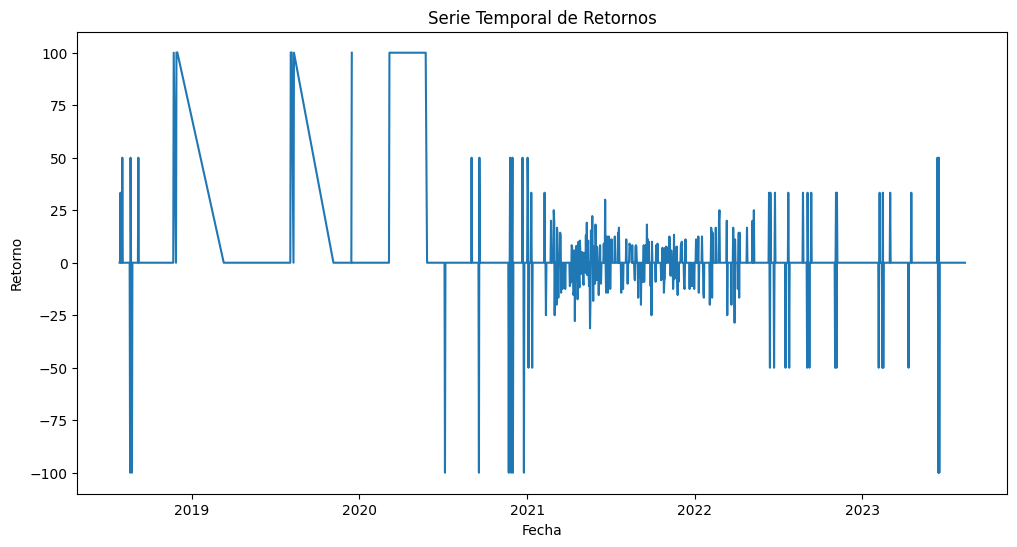

In [82]:
time_series_plot(data['vechain']['Open time'], data['vechain']['Strategy_returns'])

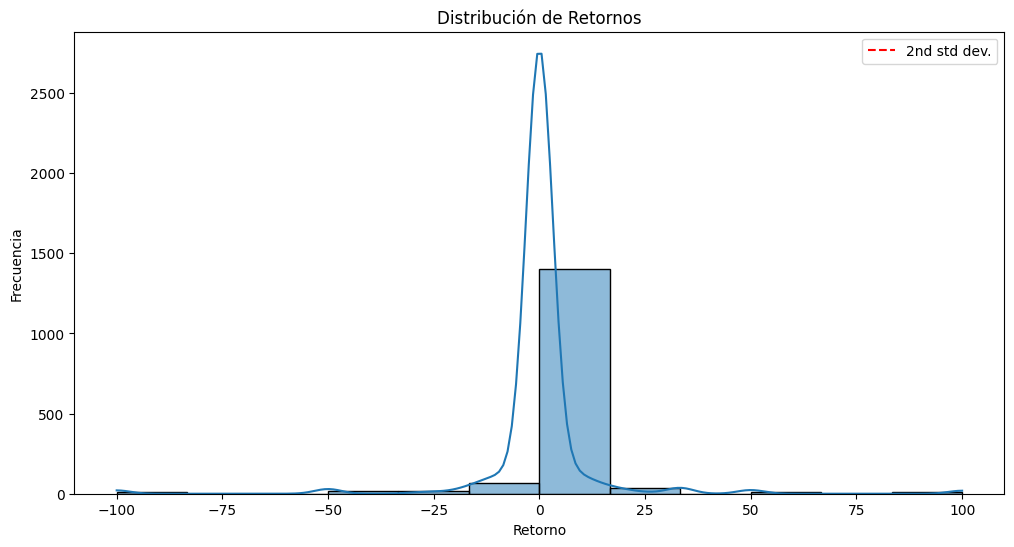

In [83]:
distribution_plot(data['vechain']['Strategy_returns'])

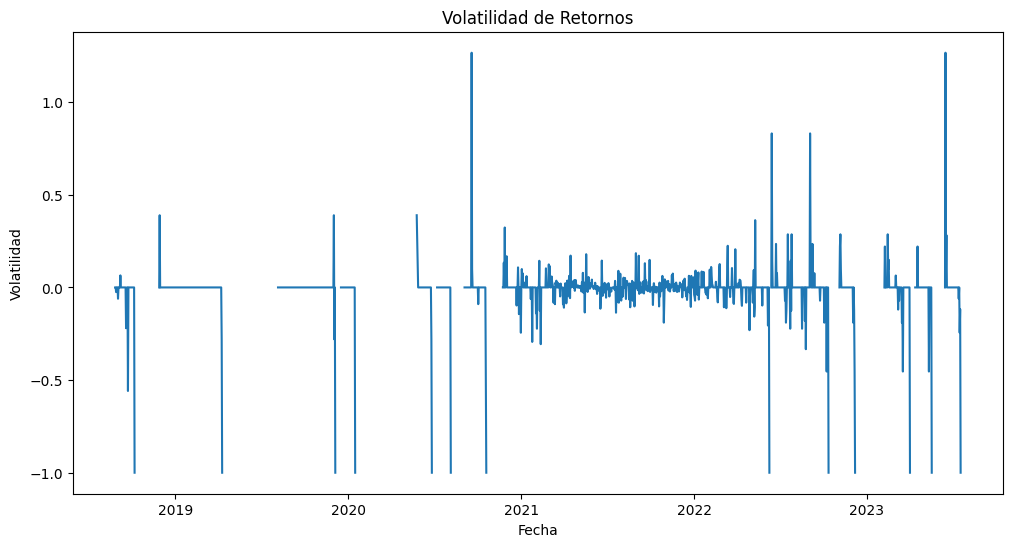

In [84]:
volatility_plot(data['vechain']['Open time'], data['vechain']['Strategy_returns'])

c:\Users\Matías Tejerina\Desktop\Cryptocurrencies Market Analysis Project\crypto-env\lib\site-packages\statsmodels\tsa\stattools.py:470: RuntimeWarning: invalid value encountered in subtract
  xo = x - x.mean()
c:\Users\Matías Tejerina\Desktop\Cryptocurrencies Market Analysis Project\crypto-env\lib\site-packages\matplotlib\axes\_base.py:2503: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


<Figure size 1200x600 with 0 Axes>

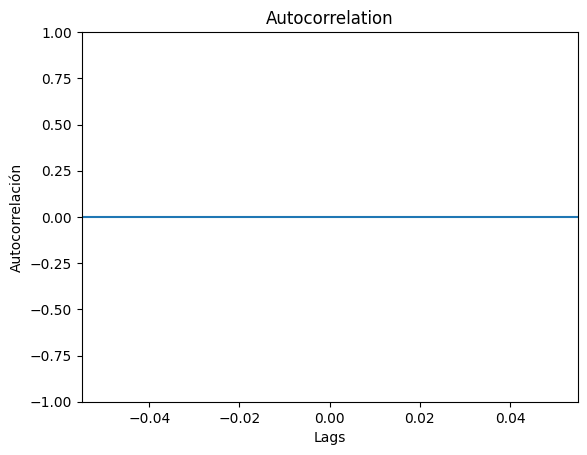

In [85]:
autocorrelation_plot(data['vechain']['Strategy_returns'])

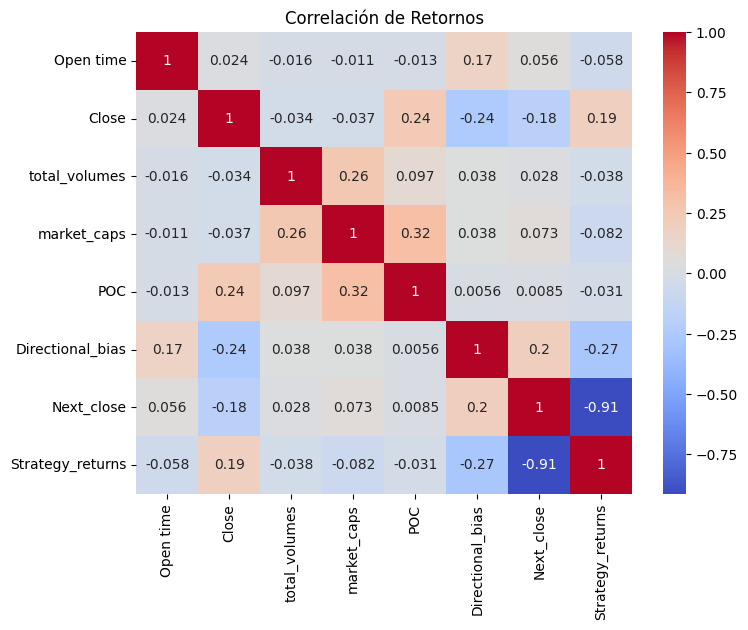

In [86]:
correlation_matrix_plot(data['vechain'])